<a href="https://colab.research.google.com/github/Tajyu/Master_Degree_Paper/blob/main/Code/Filter_64/Input_dim/3Class_Genus_BatchNormal_Input_dim_64_Layer_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import os
import pathlib
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
image_list = os.listdir('/content/drive/MyDrive/Colab Notebooks/Final_Project/Cell_Genus')

In [ ]:
print(image_list)

['10_Genus_Stauroneis_Ehrenberg', '10_Genus_Staurosira_Ehrenberg', '11_Genus_Craspedostauros_E.J_Cox_1999', '11_Genus_Staurosirella_Williams_and_Round', '12_Genus_Caloneis_Cleve_1894', '12_Genus_Synedra_Ehrenberg', '13_Genus_Pinnularia_Ehrenberg_1843', '1_Genus_Acanthoceras_Honigmann', '1_Genus_Achnanthes_Bory', '1_Genus_Actinocyclus_Ehrenberg', '1_Genus_Aphanocapsa_Nageli_1849', '1_Genus_Asterionella_Hassall', '1_Genus_Aulacoseira', '1_Genus_Biremis_Mann_et_Cox_in_Round_Crawford_and_Mann', '1_Genus_Characium_A_Braun_in_Kutzing_1849', '1_Genus_Chroococcus_Nageli', '1_Genus_Closterium_Nitzsch_ex_Ralfs_1848', '1_Genus_Coelastrum_Nageli_1849', '1_Genus_Cylindrocystis_Meneghini_ex_de_Bary_1858', '1_Genus_Dictyosphaerium_Nageli_1849', '1_Genus_Docidium_Brebisson_ex_Ralfs_1848', '1_Genus_Eunotia_Ehrenberg', '1_Genus_Geitlerinema_(Anagnostidis_et_Komarek)_Anagnostidis_1989', '1_Genus_Gonatozygon_de_Bary_1856', '1_Genus_Hydrodictyon_Roth_1797', '1_Genus_Hydrosera_whampoensis', '1_Genus_Jaagine

In [ ]:
data_generator = ImageDataGenerator(rescale = 1./255)

data_dir = "/content/drive/MyDrive/Colab Notebooks/Final_Project/Cell_Genus"

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  color_mode = "grayscale",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6226 files belonging to 107 classes.
Using 4981 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  color_mode = "grayscale",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6226 files belonging to 107 classes.
Using 1245 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['10_Genus_Stauroneis_Ehrenberg', '10_Genus_Staurosira_Ehrenberg', '11_Genus_Craspedostauros_E.J_Cox_1999', '11_Genus_Staurosirella_Williams_and_Round', '12_Genus_Caloneis_Cleve_1894', '12_Genus_Synedra_Ehrenberg', '13_Genus_Pinnularia_Ehrenberg_1843', '1_Genus_Acanthoceras_Honigmann', '1_Genus_Achnanthes_Bory', '1_Genus_Actinocyclus_Ehrenberg', '1_Genus_Aphanocapsa_Nageli_1849', '1_Genus_Asterionella_Hassall', '1_Genus_Aulacoseira', '1_Genus_Biremis_Mann_et_Cox_in_Round_Crawford_and_Mann', '1_Genus_Characium_A_Braun_in_Kutzing_1849', '1_Genus_Chroococcus_Nageli', '1_Genus_Closterium_Nitzsch_ex_Ralfs_1848', '1_Genus_Coelastrum_Nageli_1849', '1_Genus_Cylindrocystis_Meneghini_ex_de_Bary_1858', '1_Genus_Dictyosphaerium_Nageli_1849', '1_Genus_Docidium_Brebisson_ex_Ralfs_1848', '1_Genus_Eunotia_Ehrenberg', '1_Genus_Geitlerinema_(Anagnostidis_et_Komarek)_Anagnostidis_1989', '1_Genus_Gonatozygon_de_Bary_1856', '1_Genus_Hydrodictyon_Roth_1797', '1_Genus_Hydrosera_whampoensis', '1_Genus_Jaagine

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 1)
(32,)


In [ ]:
from tensorflow.keras import layers

normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
num_classes = 107
model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(64, 3,input_shape = image_batch, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    BatchNormalization(),
    layers.Dense(128, input_dim = 107, activation='relu'),
    BatchNormalization(),
    layers.Dense(128, activation='relu'),
    BatchNormalization(),
    layers.Dense(128, activation='relu'),
    BatchNormalization(),
    layers.Dense(107, activation='softmax'),
    BatchNormalization(),
    layers.Dense(num_classes)
    ])

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [ ]:
epochs=50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
156/156 [==============================] - 974s 6s/step - loss: 3.3920 - accuracy: 0.2833 - val_loss: 4.2105 - val_accuracy: 0.1438
Epoch 2/50
156/156 [==============================] - 4s 27ms/step - loss: 2.2501 - accuracy: 0.4232 - val_loss: 3.6054 - val_accuracy: 0.3502
Epoch 3/50
156/156 [==============================] - 4s 27ms/step - loss: 1.6635 - accuracy: 0.5559 - val_loss: 2.9598 - val_accuracy: 0.3823
Epoch 4/50
156/156 [==============================] - 4s 27ms/step - loss: 1.2119 - accuracy: 0.6834 - val_loss: 2.5159 - val_accuracy: 0.3751
Epoch 5/50
156/156 [==============================] - 4s 27ms/step - loss: 0.8971 - accuracy: 0.7709 - val_loss: 2.3373 - val_accuracy: 0.4369
Epoch 6/50
156/156 [==============================] - 4s 27ms/step - loss: 0.6212 - accuracy: 0.8454 - val_loss: 2.2080 - val_accuracy: 0.4755
Epoch 7/50
156/156 [==============================] - 4s 27ms/step - loss: 0.4333 - accuracy: 0.8964 - val_loss: 2.5305 - val_accuracy: 0.4683

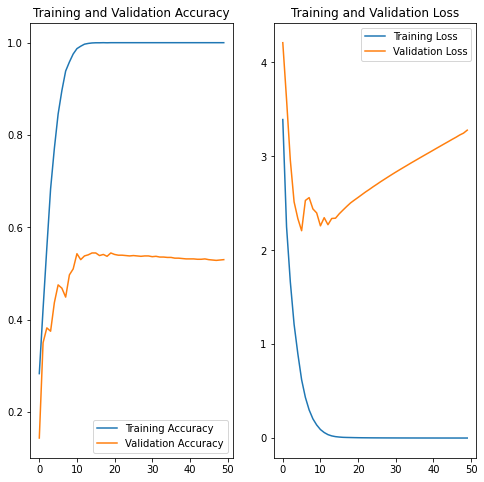

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              1)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [ ]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(64, 3,input_shape = image_batch, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, input_dim = 107, activation='relu'),
  BatchNormalization(),
  layers.Dense(128, activation='relu'),
  BatchNormalization(),
  layers.Dense(128, activation='relu'),
  BatchNormalization(),
  layers.Dense(107, activation='softmax'),
  BatchNormalization(),
  layers.Dense(num_classes)
])

In [ ]:
BatchNormalization(),model.compile(
    optimizer='adam',
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

(<keras.layers.normalization.batch_normalization.BatchNormalization at 0x7f3d3a4dcf10>,
 None)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 1)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 1)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 64)      640       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 89, 89, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 89, 89, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 44, 44, 64)       0         
 2D)                                                  

In [ ]:
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
156/156 [==============================] - 7s 32ms/step - loss: 3.6330 - accuracy: 0.2196 - val_loss: 4.1963 - val_accuracy: 0.1285
Epoch 2/50
156/156 [==============================] - 5s 29ms/step - loss: 2.6762 - accuracy: 0.3184 - val_loss: 3.6418 - val_accuracy: 0.2345
Epoch 3/50
156/156 [==============================] - 5s 29ms/step - loss: 2.3515 - accuracy: 0.3766 - val_loss: 3.1749 - val_accuracy: 0.2586
Epoch 4/50
156/156 [==============================] - 5s 29ms/step - loss: 2.1727 - accuracy: 0.4035 - val_loss: 2.5652 - val_accuracy: 0.3398
Epoch 5/50
156/156 [==============================] - 4s 29ms/step - loss: 1.9934 - accuracy: 0.4391 - val_loss: 2.7066 - val_accuracy: 0.3438
Epoch 6/50
156/156 [==============================] - 4s 29ms/step - loss: 1.8921 - accuracy: 0.4571 - val_loss: 2.8677 - val_accuracy: 0.3357
Epoch 7/50
156/156 [==============================] - 5s 29ms/step - loss: 1.7717 - accuracy: 0.4818 - val_loss: 2.9097 - val_accuracy: 0.3245

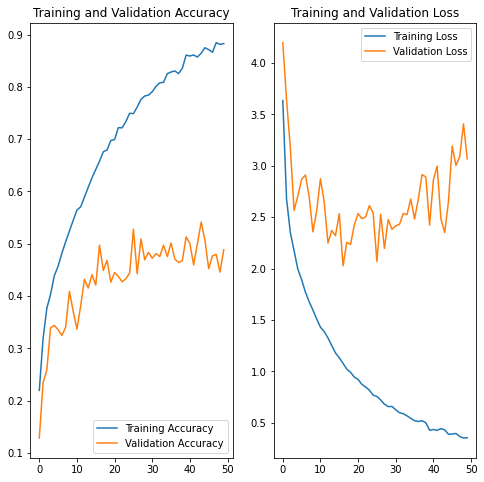

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 1)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 1)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 64)      640       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 89, 89, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 89, 89, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 44, 44, 64)       0         
 2D)                                                  